In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [5]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [6]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [7]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [8]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [9]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [10]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [11]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [12]:
match_df.shape

(641, 20)

In [13]:
match_df = match_df[match_df['dl_applied'] == 0]

In [14]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [15]:
delivery_df = match_df.merge(delivery,on='match_id')

In [16]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [17]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [18]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].transform('cumsum')

In [19]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [20]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [21]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [22]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [23]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [24]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [25]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [26]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [27]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [28]:
final_df = final_df.sample(final_df.shape[0])

In [29]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
65471,Mumbai Indians,Deccan Chargers,Mumbai,37,47,7,100,5.178082,4.723404,1


In [30]:
final_df.dropna(inplace=True)

In [31]:
final_df = final_df[final_df['balls_left'] != 0]

In [32]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [33]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
108016,Rajasthan Royals,Mumbai Indians,Mumbai,162,106,10,187,10.714286,9.169811
68327,Kolkata Knight Riders,Mumbai Indians,Kolkata,150,83,8,182,5.189189,10.843373
77126,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,15,24,7,117,6.375000,3.750000
83245,Kolkata Knight Riders,Royal Challengers Bangalore,Ranchi,105,102,9,115,3.333333,6.176471
38332,Rajasthan Royals,Deccan Chargers,Ahmedabad,109,96,10,148,9.750000,6.812500
...,...,...,...,...,...,...,...,...,...
132444,Kolkata Knight Riders,Rajasthan Royals,Kolkata,123,106,9,144,9.000000,6.962264
72192,Kolkata Knight Riders,Chennai Super Kings,Chennai,130,79,9,190,8.780488,9.873418
64469,Mumbai Indians,Delhi Daredevils,Delhi,126,63,7,207,8.526316,12.000000
90490,Chennai Super Kings,Sunrisers Hyderabad,Sharjah,132,106,10,145,5.571429,7.471698


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [36]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [37]:
pipe.fit(X_train,y_train)

C:\Users\MADHU\Desktop\ipl_win_prediction\env\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [38]:
y_pred = pipe.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8037704113813161

In [40]:
pipe.predict_proba(X_test)[10]

array([0.05139044, 0.94860956])

In [41]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    


In [42]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [43]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.6,43.4
10467,2,8,0,51.2,48.8
10473,3,1,0,58.0,42.0
10479,4,7,1,69.6,30.4
10485,5,12,0,59.5,40.5
10491,6,13,0,47.2,52.8
10497,7,9,0,41.4,58.6
10505,8,15,0,27.6,72.4
10511,9,7,0,25.4,74.6
10518,10,17,0,14.0,86.0


Text(0.5, 1.0, 'Target-178')

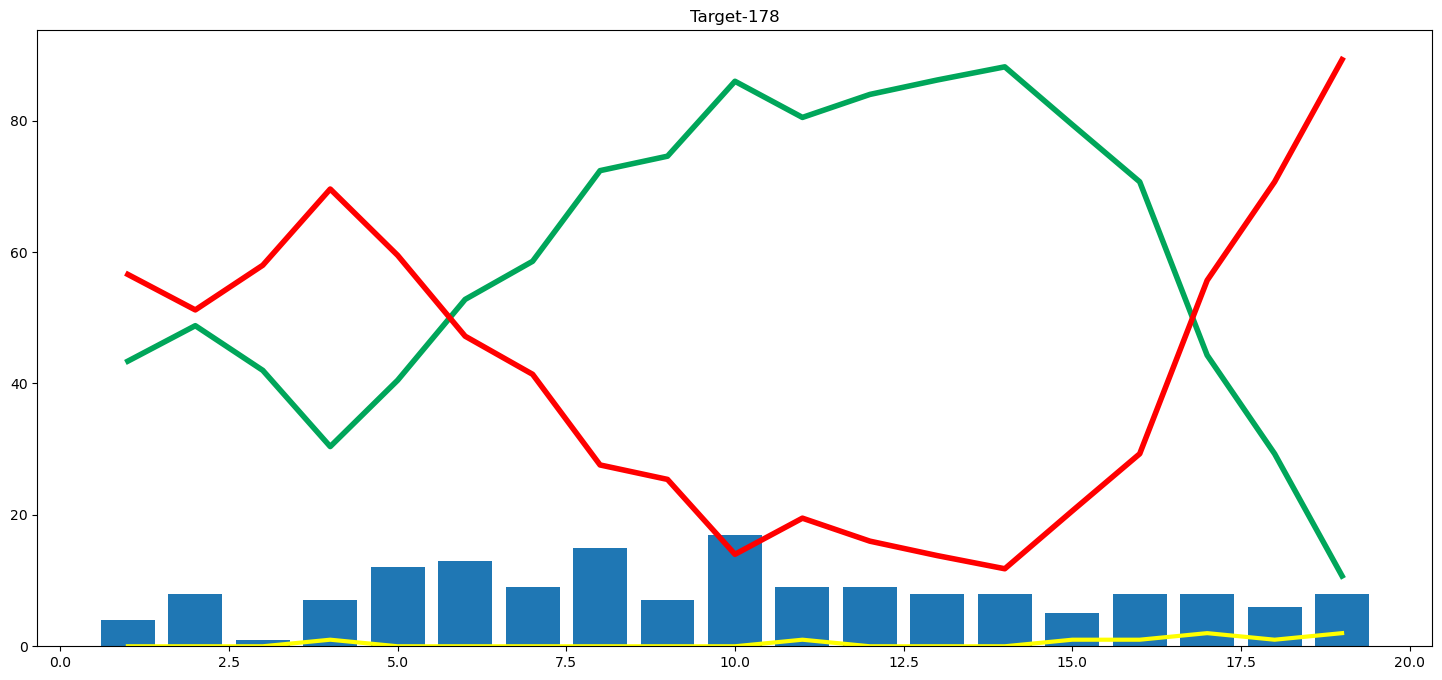

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [54]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [55]:
import streamlit as st
import pickle
import pandas as pd

teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals']

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi', 'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Mohali', 'Bengaluru']

pipe = pickle.load(open('pipe.pkl', 'rb'))
st.title('IPL Win Predictor')

col1, col2 = st.columns(2)

with col1:
    batting_team = st.selectbox('Select the batting team', sorted(teams))
with col2:
    bowling_team = st.selectbox('Select the bowling team', sorted(teams))

selected_city = st.selectbox('Select host city', sorted(cities))

target = st.number_input('Target')

col3, col4, col5 = st.columns(3)

with col3:
    score = st.number_input('Score')
with col4:
    overs = st.number_input('Overs completed')
with col5:
    wickets = st.number_input('Wickets out')
if st.button('Predict Probability'):
    runs_left = target - score
    balls_left = 120 - (overs * 6)
    wickets = 10 - wickets
    crr = score / overs
    rrr = (runs_left * 6) / balls_left

    input_df = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team], 'city': [selected_city], 'runs_left': [runs_left], 'balls_left': [balls_left], 'wickets': [wickets], 'total_runs_x': [target], 'crr': [crr], 'rrr': [rrr]})

    result = pipe.predict_proba(input_df)
    loss = result[0][0]
    win = result[0][1]

    st.header(batting_team + " - " + str(round(win * 100)) + "%")
    st.header(bowling_team + " - " + str(round(loss * 100)) + "%")


In [52]:
pip install streamlit



  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/34/01/9d1460a6e71d6226e1f5c5053de20758c41100c5c15abb73551273a96fb8/streamlit-1.27.2-py2.py3-none-any.whl.metadata
  Using cached streamlit-1.27.2-py2.py3-none-any.whl.metadata (8.1 kB)
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/17/16/b12fca347ff9d062e3c44ad9641d2ec50364570a059f3078ada3a5119d7a/altair-5.1.2-py3-none-any.whl.metadata
  Using cached altair-5.1.2-py3-none-any.whl.metadata (8.6 kB)
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/bf/2b/11bcedb7dee4923253a4a21bae3be854bcc4f06295bd827756352016d97c/blinker-1.6.3-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/a9/c9/c8a7710f2cedcb1db9224fdd4d8307c9e48cbddc46c18b515fefc0f1abbe/cachetools-5.3.1-py3-none-any.whl.metadata
  Using cached cachetools-5.3.

In [55]:
pip install --upgrade streamlit


Note: you may need to restart the kernel to use updated packages.


In [56]:
import streamlit as st
import pickle
import pandas as pd

teams = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Royal Challengers Bangalore', 'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals', 'Delhi Capitals']

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi', 'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', 'Mohali', 'Bengaluru']

pipe = pickle.load(open('pipe.pkl', 'rb'))
st.title('IPL Win Predictor')

col1, col2 = st.columns(2)

with col1:
    batting_team = st.selectbox('Select the batting team', sorted(teams))
with col2:
    bowling_team = st.selectbox('Select the bowling team', sorted(teams))

selected_city = st.selectbox('Select host city', sorted(cities))

target = st.number_input('Target')

col3, col4, col5 = st.columns(3)

with col3:
    score = st.number_input('Score')
with col4:
    overs = st.number_input('Overs completed')
with col5:
    wickets = st.number_input('Wickets out')
if st.button('Predict Probability'):
    runs_left = target - score
    balls_left = 120 - (overs * 6)
    wickets = 10 - wickets
    crr = score / overs
    rrr = (runs_left * 6) / balls_left

    input_df = pd.DataFrame({'batting_team': [batting_team], 'bowling_team': [bowling_team], 'city': [selected_city], 'runs_left': [runs_left], 'balls_left': [balls_left], 'wickets': [wickets], 'total_runs_x': [target], 'crr': [crr], 'rrr': [rrr]})

    result = pipe.predict_proba(input_df)
    loss = result[0][0]
    win = result[0][1]

    st.header(batting_team + " - " + str(round(win * 100)) + "%")
    st.header(bowling_team + " - " + str(round(loss * 100)) + "%")


In [57]:
streamlit run app.py


SyntaxError: invalid syntax (507122745.py, line 1)